In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

In [2]:
!pip install yfinance
import yfinance as yf
import requests
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install fix_yahoo_finance
import pandas as pd

  Using cached pandas-1.5.0-cp39-cp39-win_amd64.whl (10.9 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.4.3.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [3]:
from scipy.stats.mstats import gmean
!pip install quantstats
import quantstats as qs
qs.extend_pandas
#arrumar media geometrica

<function quantstats.extend_pandas()>

In [4]:
# 'EGIE3.sa', 'TAEE11.SA', 'EQTL3.SA', 'GMAT3.SA', 'ITSA4.SA','FLRY3.SA', 'PSSA3.SA', 'SAPR4.SA'
#['ivv', 'vea' , 'vnq', 'kweb', 'BLK']

#'RADL3.SA','CCRO3.SA','ECOR3.SA','CMIG4.SA','BRML3.SA','BBSE3.SA','BBDC3.SA','SBSP3.SA','UGPA3.SA',
        #  'KLBN11.SA','BBDC4.SA','MULT3.SA','ENBR3.SA','EQTL3.SA','ITSA4.SA','JBSS3.SA','USIM5.SA','VALE3.SA','PCAR3.SA',
         # 'BBAS3.SA','PETR3.SA','OIBR4.SA','AMER3.SA','PETR4.SA','LREN3.SA','VIVT3.SA','BRKM5.SA'

In [5]:
start = datetime(2018, 1, 1)
end = datetime(2022, 9, 21)
dolar = web.get_data_yahoo('USDBRL=X', start, end) ['Adj Close']
#Escolher os ativos que quer fazer a simulação
acoes = ['ivv' , 'vnq', 'kweb', 'BLK', 
         'EGIE3.sa', 'TAEE11.SA', 'GMAT3.SA', 'ITSA4.SA','FLRY3.SA', 'PSSA3.SA', 'SAPR4.SA']
dados = web.get_data_yahoo(acoes, start, end) ['Adj Close']
#Faz os ativos internacionais * pelo dolar para ter os valores em real
dados['ivv'] = dados['ivv'] * dolar
dados['vnq'] = dados['vnq'] * dolar
dados['kweb'] = dados['kweb'] * dolar
dados['BLK'] = dados['BLK'] * dolar
dados = dados.bfill()
dados

Symbols             ivv         vnq        kweb          BLK   EGIE3.sa  \
Date                                                                      
2018-01-02   827.224398  232.871940  182.167198  1493.257411  20.110971   
2018-01-03   818.650727  228.465088  180.321729  1484.766158  19.975847   
2018-01-04   816.568668  222.992389  180.800206  1494.069286  19.716858   
2018-01-05   821.122482  222.937055  183.886037  1505.680827  19.818203   
2018-01-08   821.287303  223.641763  185.716585  1513.861450  19.930801   
...                 ...         ...         ...          ...        ...   
2022-09-15  2056.838445  473.617897  145.159586  3317.318983  39.290001   
2022-09-16  2027.664990  466.208351  139.666007  3282.125172  39.500000   
2022-09-19  2027.664990  466.208351  139.666007  3282.125172  39.950001   
2022-09-20  1978.849652  449.179115  133.005831  3162.069053  39.889999   
2022-09-21  1978.849652  449.179115  133.005831  3162.069053  39.930000   

Symbols     TAEE11.SA  GMAT3.SA  ITSA4.SA   FLRY3.SA   PSSA3.SA  SAPR4.SA  
Date                                                                       
2018-01-02  13.039618      8.94  7.335380  24.428169  12.671288  2.938692  
2018-01-03  13.057847      8.94  7.421840  23.950092  12.901043  2.928290  
2018-01-04  12.851254      8.94  7.561495  23.470924  12.911487  2.889281  
2018-01-05  12.912017      8.94  7.574796  23.809647  13.162127  2.938692  
2018-01-08  12.851254      8.94  7.568144  23.190037  13.095986  2.938692  
...               ...       ...       ...        ...        ...       ...  
2022-09-15  40.840000      6.75  9.350000  16.510000  22.530001  3.530000  
2022-09-16  40.650002      6.85  9.280000  17.000000  22.559999  3.550000  
2022-09-19  40.939999      6.88  9.560000  16.969999  22.600000  3.540000  
2022-09-20  41.299999      6.84  9.830000  17.230000  22.900000  3.550000  
2022-09-21  41.770000      6.78  9.780000  17.139999  22.379999  3.560000  

[1218 rows x 11 columns]

In [55]:
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 252
retorno_anual

Symbols
ivv          0.213576
vnq          0.173670
kweb         0.045263
BLK          0.214588
EGIE3.sa     0.171805
TAEE11.SA    0.262755
GMAT3.SA    -0.025100
ITSA4.SA     0.106774
FLRY3.SA    -0.011869
PSSA3.SA     0.164476
SAPR4.SA     0.092789
dtype: float64

In [56]:
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 252

retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

numero_acoes = len(acoes)
numero_carteiras = 1000000
np.random.seed(101)

In [57]:
for cada_carteira in range(numero_carteiras):
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    retorno = np.dot(peso, retorno_anual)
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    sharpe = retorno / volatilidade
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)
    

In [58]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao] = [Peso[contar] for Peso in peso_acoes]

df = pd.DataFrame(carteira)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao for acao in acoes]
df = df[colunas]

In [59]:
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()
maior_retorno = df['Retorno'].max()

carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]
carteira_maior_retorno = df.loc[df['Retorno'] == maior_retorno]

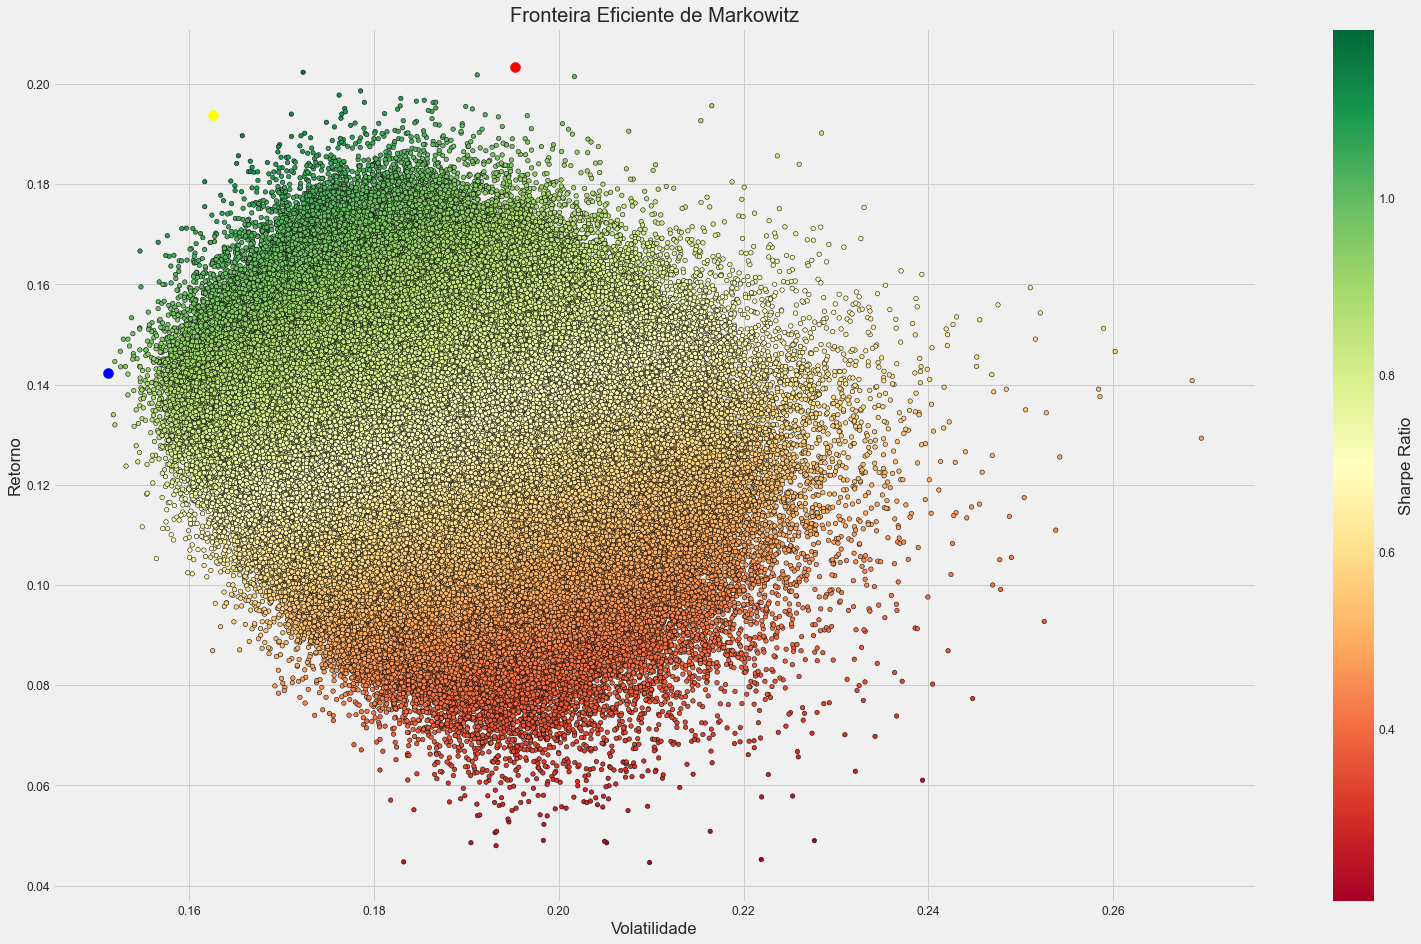

In [60]:
#plotando a carteira com melhor sharpe, minima variancia e maior retorno.
plt.style.use('fivethirtyeight')
scatter = df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', 
                cmap='RdYlGn', edgecolors='black', figsize=(24, 15) ,grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='yellow', marker='o', s=100)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=100 )
plt.scatter(x=carteira_maior_retorno['Volatilidade'], y=carteira_maior_retorno['Retorno'], c='red', marker='o', s=100 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.title('Fronteira Eficiente de Markowitz')
plt.show(scatter)

<AxesSubplot:xlabel='Date'>

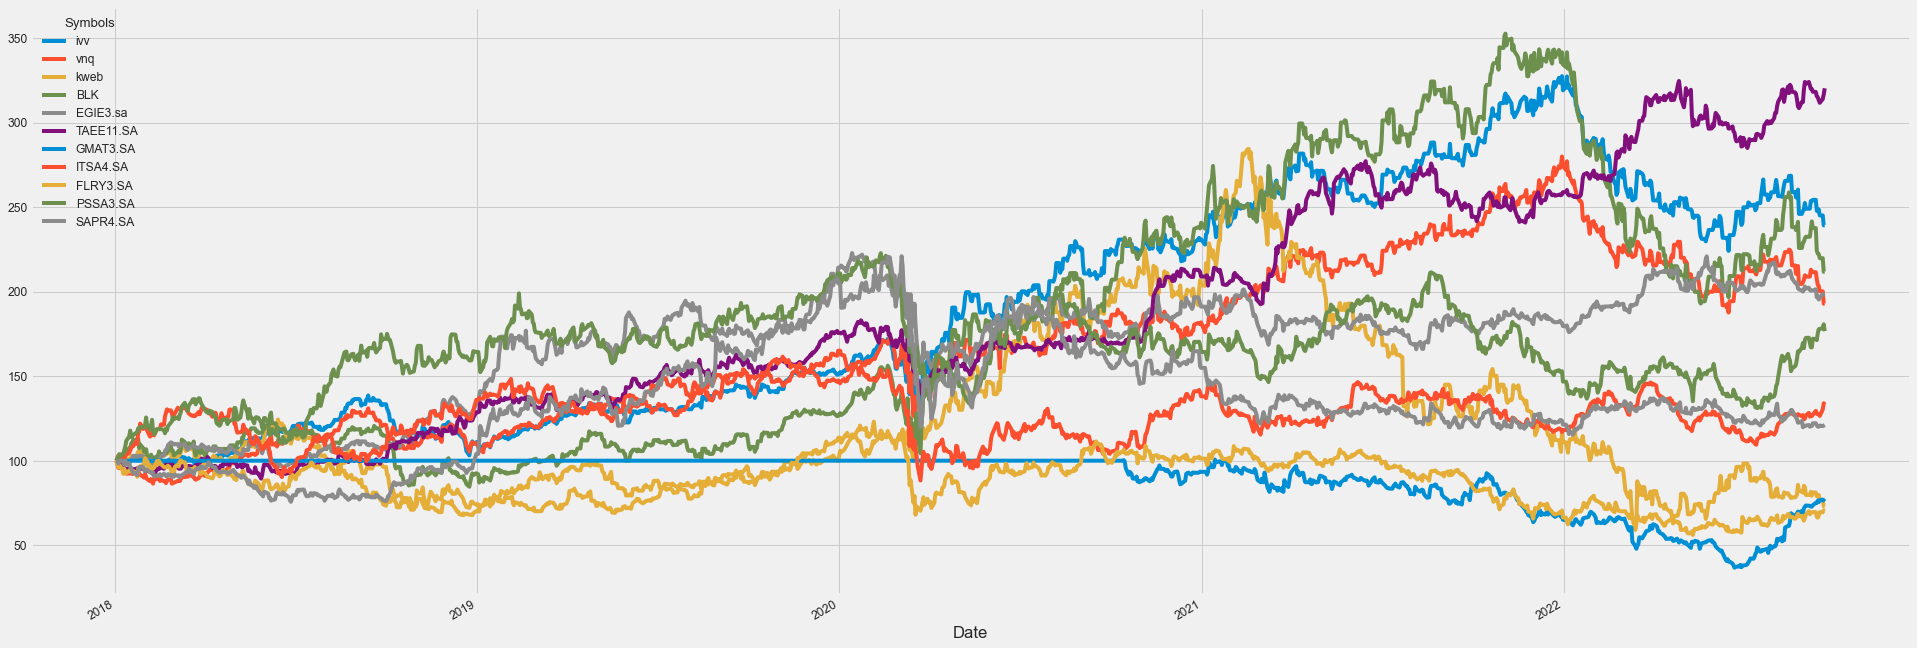

In [61]:
(dados / dados .iloc[0] * 100).plot(figsize=(30,12), grid=True)

In [62]:
corr_mat = pd.DataFrame.corr(dados)
corr_mat.style.background_gradient(cmap='RdYlGn')

In [63]:
peso_min_var = carteira_min_variancia[acoes]
peso_max_sharp = carteira_sharpe[acoes]
peso_max_ret = carteira_maior_retorno[acoes]

daily_values_maxsharp =((peso_max_sharp.values * (dados / dados.iloc[0])))
daily_values_min_var =((peso_min_var.values * (dados / dados.iloc[0])))
daily_values_maxret =((peso_max_ret.values * (dados / dados.iloc[0])))


In [64]:
ibov = web.get_data_yahoo("^BVSP", start, end) ['Adj Close']
ibovespa = (ibov  / ibov .iloc[0] *100)


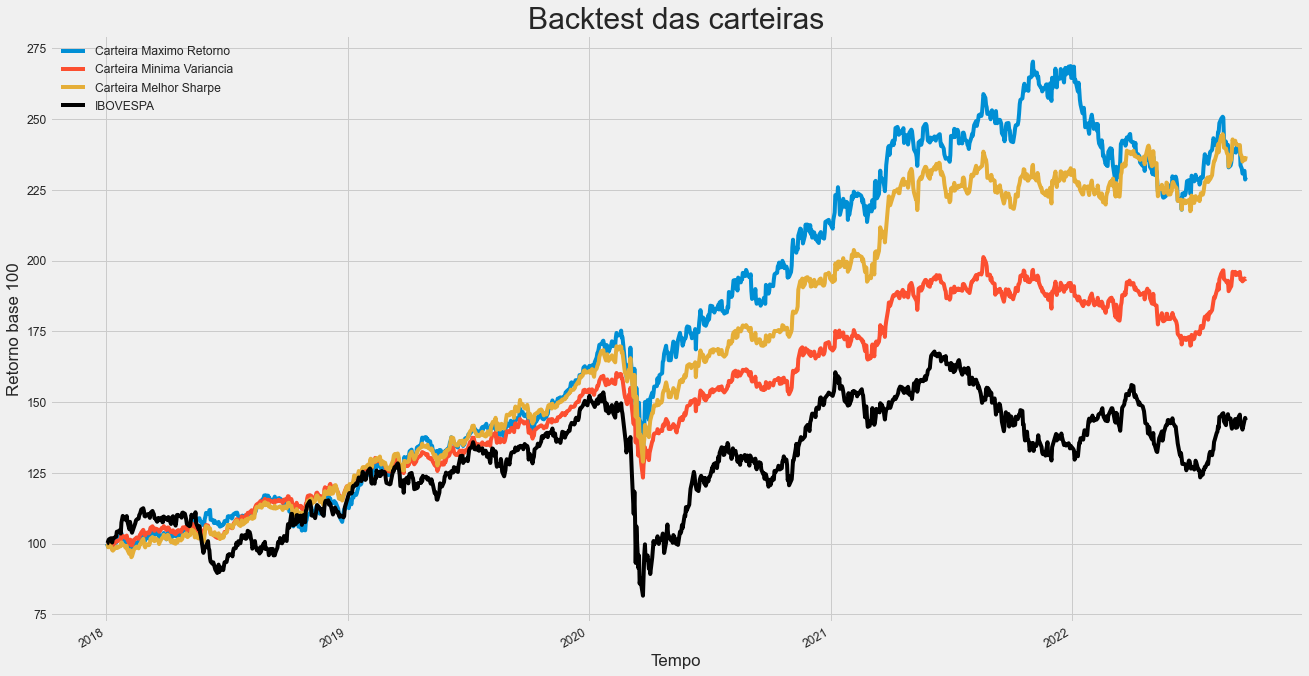

In [65]:
#Comparação das carteiras
maxsharp_backtest = daily_values_maxsharp[acoes].sum(axis=1)
min_var_backtest = daily_values_min_var[acoes].sum(axis=1)
max_ret_backtest = daily_values_maxret[acoes].sum(axis=1)
(max_ret_backtest / max_ret_backtest.iloc[0]*100).plot(figsize = (20, 12), label = 'Carteira Maximo Retorno', grid=True)
(min_var_backtest / min_var_backtest.iloc[0]*100).plot(figsize = (20, 12), label = 'Carteira Minima Variancia', grid=True)
(maxsharp_backtest / maxsharp_backtest.iloc[0]*100).plot(figsize = (20, 12), label = 'Carteira Melhor Sharpe', grid=True)
ibovespa.plot(figsize = (20, 12), label = 'IBOVESPA', grid=True, color = 'Black')
plt.style.use('seaborn-dark')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Retorno base 100')
plt.title('Backtest das carteiras', size = (30))
plt.show()

In [66]:
print("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T )
print('\n')
print("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T )
print('\n')
print("Essa é a carteira com maior Retorno:", '\n', carteira_maior_retorno.T)

Essa é a carteira de Mínima Variância: 
                 516847
Retorno       0.142284
Volatilidade  0.151220
Sharpe Ratio  0.940907
ivv           0.165980
vnq           0.047670
kweb          0.006578
BLK           0.014757
EGIE3.sa      0.048575
TAEE11.SA     0.249317
GMAT3.SA      0.246286
ITSA4.SA      0.072732
FLRY3.SA      0.023546
PSSA3.SA      0.116817
SAPR4.SA      0.007741


Essa é a carteira com maior Sharpe Ratio: 
                 985096
Retorno       0.193849
Volatilidade  0.162599
Sharpe Ratio  1.192194
ivv           0.102523
vnq           0.134903
kweb          0.066964
BLK           0.031561
EGIE3.sa      0.018639
TAEE11.SA     0.458784
GMAT3.SA      0.061955
ITSA4.SA      0.020698
FLRY3.SA      0.014566
PSSA3.SA      0.086381
SAPR4.SA      0.003027


Essa é a carteira com maior Retorno: 
                 976468
Retorno       0.203342
Volatilidade  0.195302
Sharpe Ratio  1.041164
ivv           0.232792
vnq           0.050757
kweb          0.030156
BLK           0.23285

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2018-01-02  2018-01-02
End Period                 2022-09-21  2022-09-21
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      96.0%

Cumulative Return          136.89%     44.45%
CAGR﹪                     20.04%      8.1%

Sharpe                     1.18        0.42
Prob. Sharpe Ratio         99.43%      81.88%
Smart Sharpe               0.99        0.35
Sortino                    1.72        0.57
Smart Sortino              1.44        0.48
Sortino/√2                 1.22        0.4
Smart Sortino/√2           1.02        0.34
Omega                      1.24        1.24

Max Drawdown               -24.02%     -46.82%
Longest DD Days            214         470
Volatility (ann.)          16.21%      26.67%
R^2                        0.42        0.42
Information Ratio          0.02        0.02
Calmar                     0.83        0.1

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-02-13  2020-03-23  2020-07-31   169    -24.018759        -19.972671
2  2022-04-28  2022-06-29  2022-08-10   104     -9.635118         -9.439141
3  2021-08-23  2021-10-05  2022-03-25   214     -8.473403         -8.229252
4  2021-05-04  2021-05-12  2021-05-24    20     -6.250465         -4.922354
5  2021-06-15  2021-06-30  2021-08-19    65     -5.952217         -5.722282

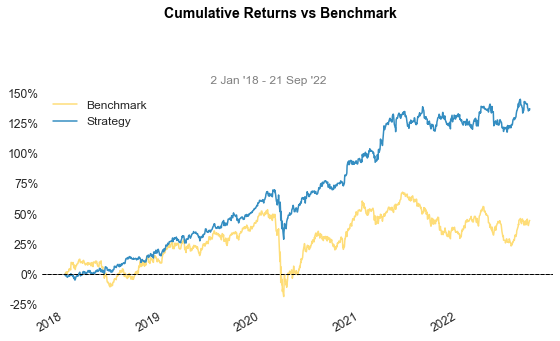

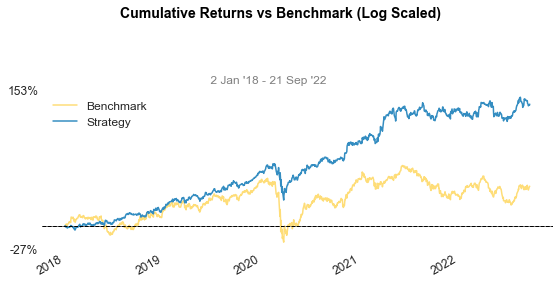

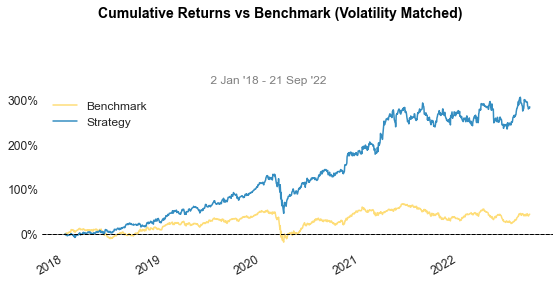

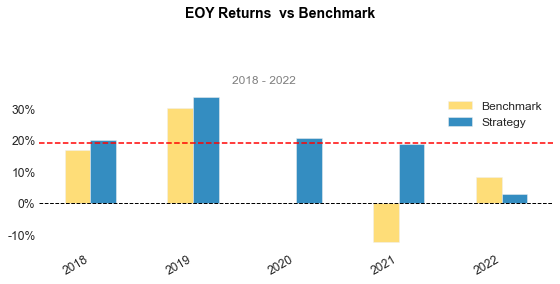

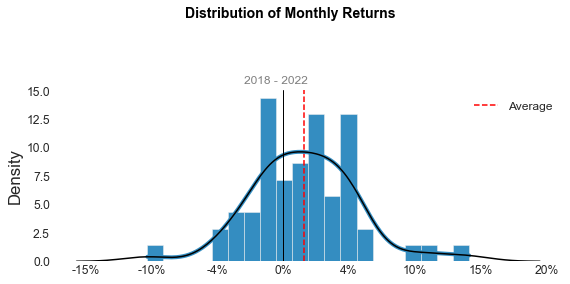

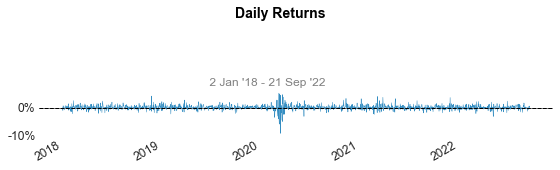

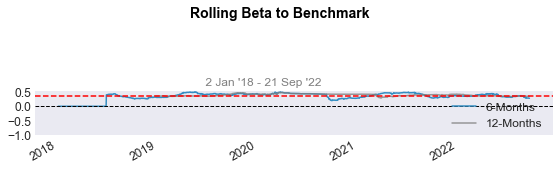

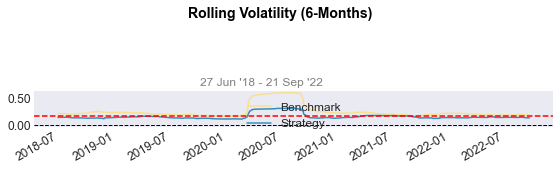

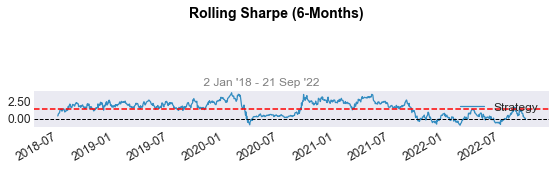

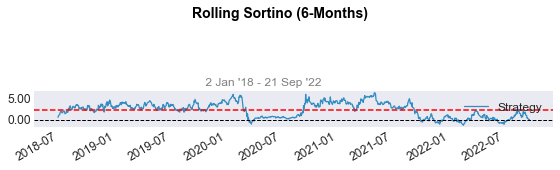

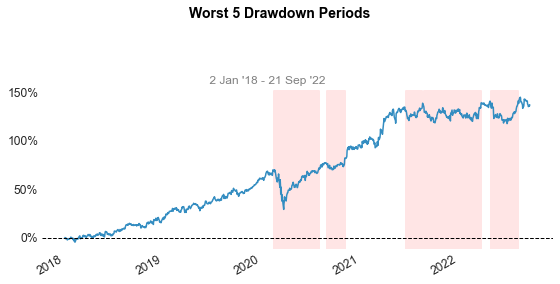

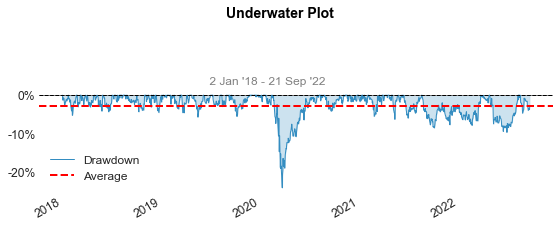

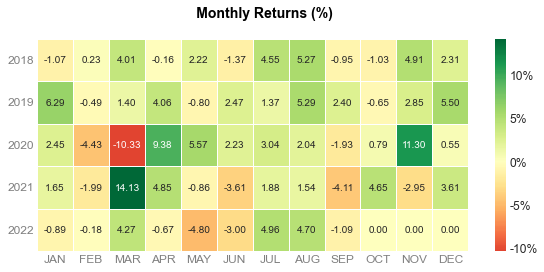

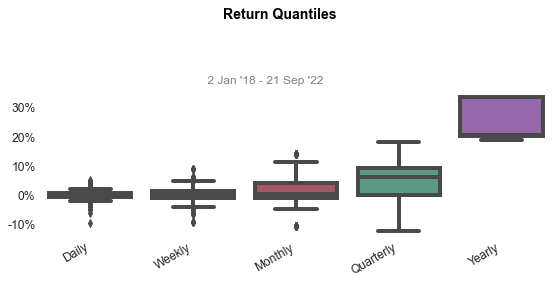

In [67]:
#Plotando o relatorio da quantsats com a carteira maxsharp, da pra fazer com as outras também
qs.reports.full(maxsharp_backtest, "^BVSP")

In [19]:
maxsharp_backtest_dol = (maxsharp_backtest * 100) / dolar
qs.reports.html(maxsharp_backtest_dol, "^GSPC")

In [20]:
ewz = web.get_data_yahoo('EWZ', start, end) ['Adj Close']
snp500 = web.get_data_yahoo("^GSPC", start, end) ['Adj Close']                       

<AxesSubplot:title={'center':'IBOV em dolar vs SNP500'}, xlabel='Date'>

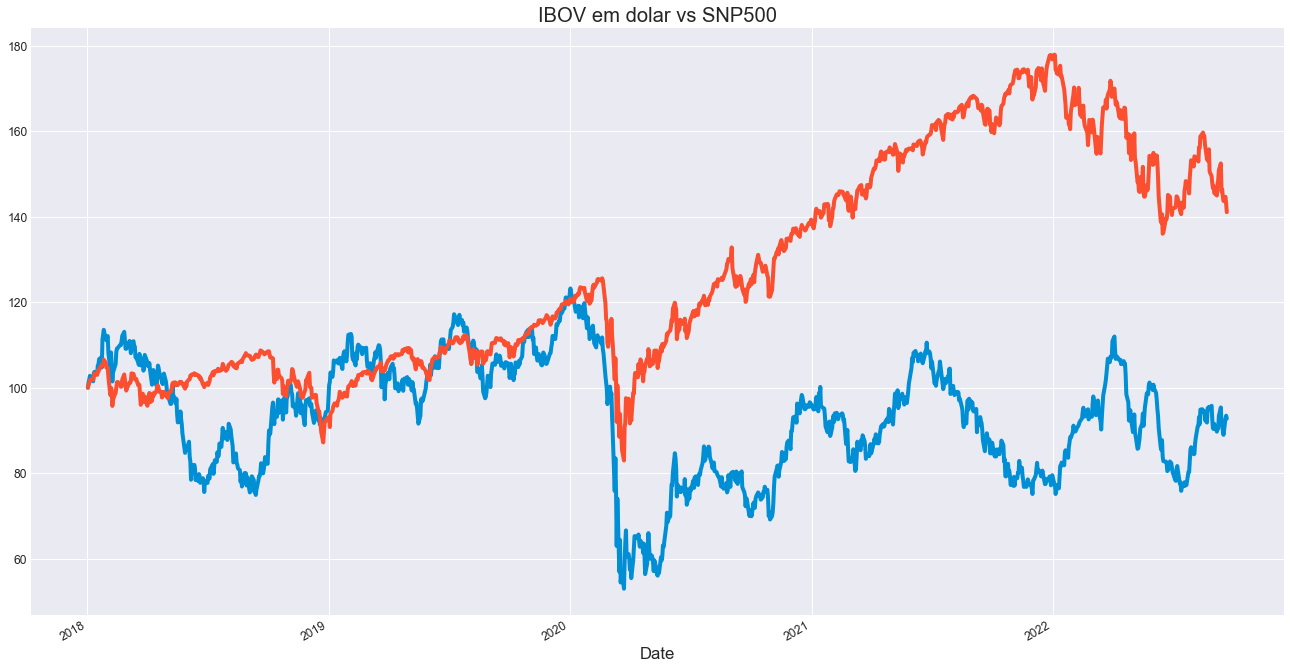

In [53]:
(ewz / ewz.iloc[0] * 100).plot( figsize = (20, 12), label = 'ewz', grid=True)
(snp500 / snp500.iloc[0] * 100).plot( figsize = (20, 12), label = 'snp500', grid=True, title = 'IBOV em dolar vs SNP500')

In [54]:
np.corrcoef(ewz, snp500)

array([[ 1.        , -0.11861971],
       [-0.11861971,  1.        ]])